In [6]:
import pandas as pd

# read the police data CSV file
police_data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")
# count the number of arrests in each neighborhood
neighborhood_arrests_counts = police_data['INCIDENTNEIGHBORHOOD'].value_counts()

# read the trash data CSV file
trash_data = pd.read_csv("IllegalTrash.csv")
# count the number of trash sites in each neighborhood
neighborhood_trash_counts = trash_data['Neighborhood'].value_counts()

# read the playgrounds data CSV file
playgrounds_data = pd.read_csv("Pittsburgh_Playgrounds.csv")
# count the number of playgrounds in each neighborhood
neighborhood_playgrounds_counts = playgrounds_data['neighborhood'].value_counts()

# merge counts into a single dataframe, excluding neighborhoods not included in all data sets
combined_counts = pd.concat([neighborhood_arrests_counts, neighborhood_trash_counts, neighborhood_playgrounds_counts], axis=1, join='inner')
combined_counts.columns = ['Number of Arrests', 'Number of Trash Sites', 'Number of Playgrounds']

# standardize the data using z-score normalization # shout out to stat 1152 for helping
def standardize_data(df):
    return (df - df.mean()) / df.std()
# standardize police arrests, dump sites, and playgrounds data
police_arrests_standardized = standardize_data(combined_counts[['Number of Arrests']])
dump_sites_standardized = standardize_data(combined_counts[['Number of Trash Sites']])
playgrounds_standardized = standardize_data(combined_counts[['Number of Playgrounds']])

# combine standardized data into a single dataframe
combined_data = pd.DataFrame({
    'Neighborhood': combined_counts.index,
    'Police Arrests': police_arrests_standardized['Number of Arrests'],
    'Dump Sites': dump_sites_standardized['Number of Trash Sites'],
    'Playgrounds': playgrounds_standardized['Number of Playgrounds']
})

# weights will all be equal for our 3 data sets, since we believe each metric is of equal importance
weights = {'Police Arrests': 1 / 3, 'Dump Sites': 1 / 3, 'Playgrounds': 1 / 3}

# calculate combined score using weighted sum
combined_data['Combined Score'] = (combined_data['Police Arrests'] * weights['Police Arrests'] +
                                   combined_data['Dump Sites'] * weights['Dump Sites'] +
                                   combined_data['Playgrounds'] * weights['Playgrounds'])

# rank neighborhoods based on combined score
ranked_neighborhoods = combined_data[['Neighborhood', 'Combined Score']].sort_values(by='Combined Score').reset_index(drop=True)

print("\nNeighborhoods Ranked by Combined Score:")
print(ranked_neighborhoods)



Neighborhoods Ranked by Combined Score:
                Neighborhood  Combined Score
0                       Hays       -0.729388
1             Swisshelm Park       -0.727153
2              East Carnegie       -0.724115
3                    Windgap       -0.702449
4                Polish Hill       -0.701439
5         Point Breeze North       -0.651217
6                 Banksville       -0.650002
7              Spring Garden       -0.620221
8              New Homestead       -0.607041
9            Terrace Village       -0.572831
10          Duquesne Heights       -0.563707
11                    Esplen       -0.558239
12                 Fairywood       -0.553575
13         Central Northside       -0.544001
14              West Oakland       -0.531310
15            Strip District       -0.521197
16           Stanton Heights       -0.519756
17                Upper Hill       -0.479461
18               Morningside       -0.468261
19           Central Oakland       -0.461244
20         Bed

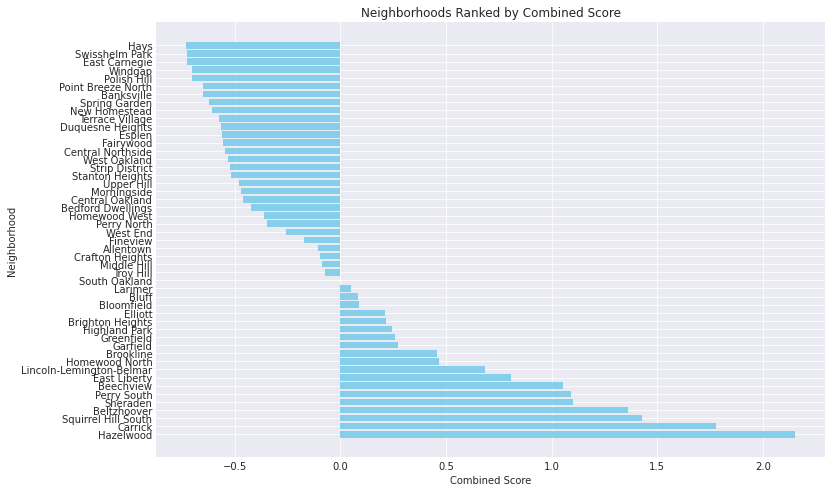

In [8]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create a bar chart of neighborhoods ranked by combined score
plt.figure(figsize=(12, 8))
plt.barh(ranked_neighborhoods['Neighborhood'], ranked_neighborhoods['Combined Score'], color='skyblue')
plt.xlabel('Combined Score')
plt.ylabel('Neighborhood')
plt.title('Neighborhoods Ranked by Combined Score')
plt.gca().invert_yaxis()  # Invert y-axis to show highest scores at the top
plt.show()